In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/kisho/Datasets/Influencer.csv")

In [3]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [4]:
df.isna().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [5]:
countries = df['Country Or Region'].dropna().unique()
df['Country Or Region'] = df['Country Or Region'].apply(lambda x: np.random.choice(countries) if pd.isnull(x) else x)

In [6]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [7]:
df['Channel Info'] = df['Channel Info'].apply(lambda x: x.strip('\n'))

In [8]:
cols = ['Followers','Avg. Likes','Posts','New Post Avg. Likes','Total Likes']

In [9]:
def get_measure(x):
    return x[-1]

Followers

In [10]:
df['Followers'].apply(get_measure).value_counts()

m    200
Name: Followers, dtype: int64

In [11]:
df['Followers(m)'] = df['Followers'].apply(lambda x: float(x[:-1]))
df.drop('Followers',axis = 1,inplace=True)

Avg. Likes

In [12]:
df['Avg. Likes'].apply(get_measure).value_counts()

m    106
k     94
Name: Avg. Likes, dtype: int64

In [13]:
def k_to_m(x):
    if x[-1]=='k':
        n = float(x[:-1])/1000
    elif x[-1]=='m':
        n = float(x[:-1])
    else:
        n = float(x)
    return round(n,2)

In [14]:
df['Avg_Likes(m)'] = df['Avg. Likes'].apply(k_to_m)
df.drop('Avg. Likes',axis = 1,inplace=True)

Posts

In [15]:
df['Posts'].apply(get_measure).value_counts()

k    146
5     11
9     11
0      7
7      6
1      4
2      4
3      3
4      3
8      3
6      2
Name: Posts, dtype: int64

In [16]:
def to_k(x):
    if x[-1] == 'k':
        n = float(x[:-1])
    else:
        n = float(x)/1000
    return n

In [17]:
df['Posts(k)'] = df['Posts'].apply(to_k)
df.drop('Posts',axis = 1,inplace=True)

New Post Avg. Likes

In [18]:
df['New Post Avg. Likes'].apply(get_measure).value_counts()

k    134
m     65
0      1
Name: New Post Avg. Likes, dtype: int64

In [19]:
df['New Post Avg. Likes(m)'] = df['New Post Avg. Likes'].apply(k_to_m)
df.drop('New Post Avg. Likes',axis=1, inplace=True)

Total Likes

In [20]:
df['Total Likes'].apply(get_measure).value_counts()

b    152
m     48
Name: Total Likes, dtype: int64

In [21]:
def b_to_m(x):
    if x[-1]=='m':
        n = float(x[:-1])
    elif x[-1]=='b':
        n = float(x[:-1])*1000
    return round(n,2)

In [22]:
df['Total_Likes(m)'] = df['Total Likes'].apply(b_to_m)
df.drop('Total Likes',axis=1,inplace=True)

In [23]:
df.dtypes

Rank                        int64
Channel Info               object
Influence Score             int64
60-Day Eng Rate           float64
Country Or Region          object
Followers(m)              float64
Avg_Likes(m)              float64
Posts(k)                  float64
New Post Avg. Likes(m)    float64
Total_Likes(m)            float64
dtype: object

In [24]:
df

,Rank,Channel Info,Influence Score,60-Day Eng Rate,Country Or Region,Followers(m),Avg_Likes(m),Posts(k),New Post Avg. Likes(m),Total_Likes(m)
0,1,cristiano,92,0.013,Spain,485.2,8.70,3.400,6.30,29100.0
1,2,kyliejenner,91,0.014,United States,370.7,8.20,7.000,5.00,57400.0
2,3,leomessi,90,0.010,Russia,363.9,6.70,0.915,3.50,6100.0
3,4,selenagomez,93,0.005,United States,348.8,6.10,1.900,1.70,11400.0
4,5,therock,91,0.003,United States,339.4,1.80,6.800,0.93,12600.0
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,0.009,Russia,33.6,0.68,4.600,0.31,3100.0
196,197,danbilzerian,84,0.064,Canada,33.6,2.20,1.400,2.10,3000.0
197,198,raisa6690,80,0.003,Indonesia,33.6,0.23,4.200,0.10,955.9
198,199,luansantana,79,0.003,Brazil,33.5,0.19,0.865,0.08,167.2


# 1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [25]:
correlation = df.corr()
correlation

C:\Users\kisho\AppData\Local\Temp\ipykernel_13816\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,Rank,Influence Score,60-Day Eng Rate,Followers(m),Avg_Likes(m),Posts(k),New Post Avg. Likes(m),Total_Likes(m)
Rank,1.000000,-0.354843,0.028900,-0.698193,-0.277651,-0.058132,-0.272441,-0.465119
Influence Score,-0.354843,1.000000,-0.072460,0.365428,0.048560,0.168287,0.039866,0.234987
60-Day Eng Rate,0.028900,-0.072460,1.000000,-0.107439,0.789356,-0.334047,0.866288,-0.001560
Followers(m),-0.698193,0.365428,-0.107439,1.000000,0.346829,0.069171,0.260733,0.667546
Avg_Likes(m),-0.277651,0.048560,0.789356,0.346829,1.000000,-0.348668,0.892777,0.361297
Posts(k),-0.058132,0.168287,-0.334047,0.069171,-0.348668,1.000000,-0.285216,0.232038
New Post Avg. Likes(m),-0.272441,0.039866,0.866288,0.260733,0.892777,-0.285216,1.000000,0.351344
Total_Likes(m),-0.465119,0.234987,-0.001560,0.667546,0.361297,0.232038,0.351344,1.000000


<Axes: >

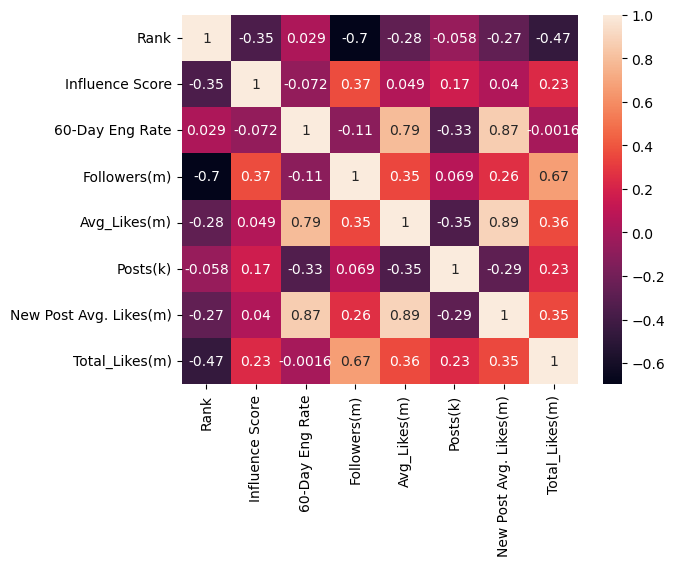

In [26]:
sns.heatmap(correlation,annot=True)

In [27]:
num_cols = [col for col in df.columns if df[col].dtype != object]
n = len(num_cols)
for i in range(n):
    for j in range(i+1,n):
        corr = df[num_cols[i]].corr(other = df[num_cols[j]])
        if corr <= -0.5 or corr >= 0.5:
            print(f'The correlation between {num_cols[i]} & {num_cols[j]} is {corr}')

The correlation between Rank & Followers(m) is -0.6981928705195849
The correlation between 60-Day Eng Rate & Avg_Likes(m) is 0.789356251170854
The correlation between 60-Day Eng Rate & New Post Avg. Likes(m) is 0.8662876356085296
The correlation between Followers(m) & Total_Likes(m) is 0.6675458848032384
The correlation between Avg_Likes(m) & New Post Avg. Likes(m) is 0.8927773410568807


## Insight
We can see that Rank and followers are negatively correlated. Less rank has more followers.  
Remaining correlations are positive. so, one column value increases with other column

# 2. What is the frequency distribution of the following features?  
### ○ Influence Score
### ○ Followers
### ○ Posts

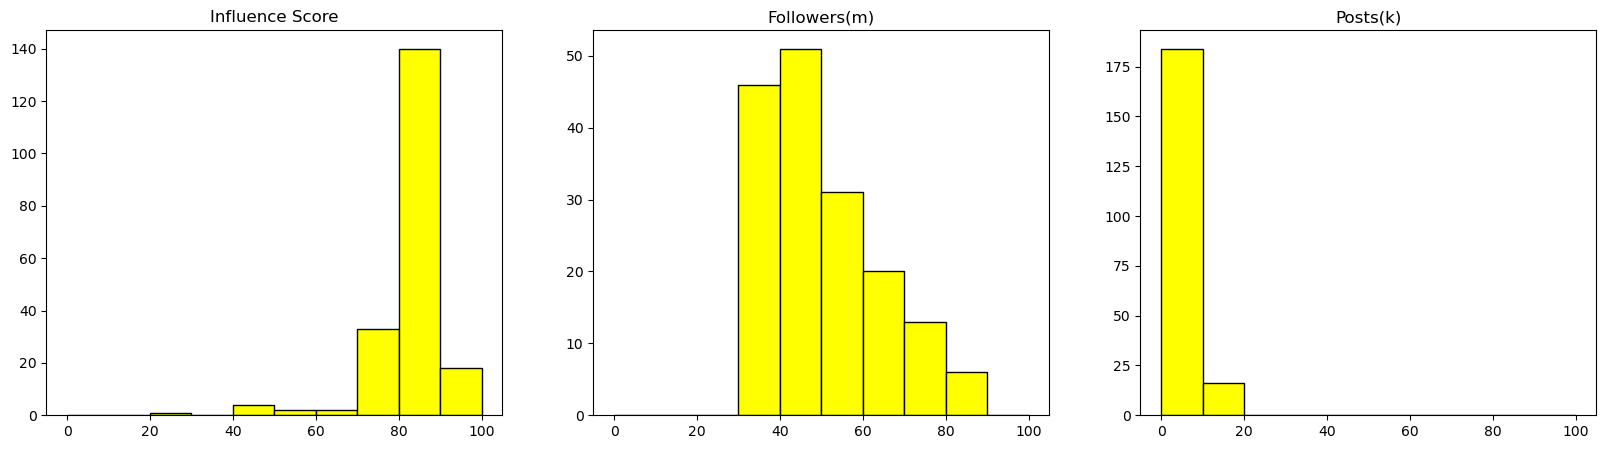

In [28]:
cols = ['Influence Score','Followers(m)','Posts(k)']
plt.figure(figsize=(20,5))
for i,feature in enumerate(cols):
    plt.subplot(1,3,i+1)
    plt.hist(df[feature],range=(0,100),bins=10,color='yellow',edgecolor='black')
    plt.title(feature)

# 3. Which country houses the highest number of Instagram Influencers?  
# Please show the count of Instagram influencers in different countries using barchart.

In [29]:
influencers_per_country = df['Country Or Region'].value_counts().reset_index()
influencers_per_country.rename(columns={'index': 'Country', 'Country Or Region': 'Count'}, inplace=True)
influencers_per_country.head()

,Country,Count
0,United States,65
1,Brazil,18
2,India,17
3,Indonesia,10
4,Spain,7


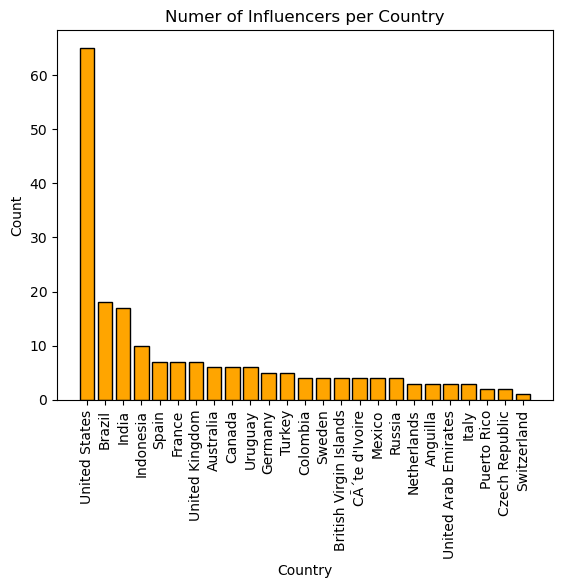

In [30]:
# plt.figure(figsize=(20,10))
plt.bar(influencers_per_country['Country'],influencers_per_country['Count'],color='orange',edgecolor='black')
plt.title('Numer of Influencers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 4. Who are the top 10 influencers in the given dataset based on the following features
## ● Followers
## ● Average likes
## ● Total Likes

In [31]:
df.sort_values('Followers(m)',ascending=False)[:10]

,Rank,Channel Info,Influence Score,60-Day Eng Rate,Country Or Region,Followers(m),Avg_Likes(m),Posts(k),New Post Avg. Likes(m),Total_Likes(m)
0,1,cristiano,92,0.013,Spain,485.2,8.7,3.400,6.30,29100.0
1,2,kyliejenner,91,0.014,United States,370.7,8.2,7.000,5.00,57400.0
2,3,leomessi,90,0.010,Russia,363.9,6.7,0.915,3.50,6100.0
3,4,selenagomez,93,0.005,United States,348.8,6.1,1.900,1.70,11400.0
4,5,therock,91,0.003,United States,339.4,1.8,6.800,0.93,12600.0
5,6,arianagrande,92,0.009,United States,333.0,3.7,5.000,3.10,18500.0
6,7,kimkardashian,91,0.005,United States,330.7,3.5,5.700,1.70,19800.0
7,8,beyonce,92,0.008,United States,276.1,3.6,2.000,2.20,7300.0
8,9,khloekardashian,89,0.002,United States,273.9,2.4,4.100,0.40,9800.0
9,10,justinbieber,91,0.007,Canada,260.0,1.9,7.400,1.70,14000.0


In [32]:
df.sort_values('Avg_Likes(m)',ascending=False)[:10]

,Rank,Channel Info,Influence Score,60-Day Eng Rate,Country Or Region,Followers(m),Avg_Likes(m),Posts(k),New Post Avg. Likes(m),Total_Likes(m)
96,97,thv,83,0.250,Turkey,51.7,15.4,0.069,12.9,1100.0
131,132,j.m,83,0.228,Indonesia,44.2,14.4,0.028,10.0,402.1
165,166,rkive,83,0.171,India,38.4,10.6,0.115,6.5,1200.0
0,1,cristiano,92,0.013,Spain,485.2,8.7,3.400,6.3,29100.0
32,33,billieeilish,73,0.047,Mexico,106.4,8.4,0.710,4.9,6000.0
1,2,kyliejenner,91,0.014,United States,370.7,8.2,7.000,5.0,57400.0
2,3,leomessi,90,0.010,Russia,363.9,6.7,0.915,3.5,6100.0
3,4,selenagomez,93,0.005,United States,348.8,6.1,1.900,1.7,11400.0
38,39,lalalalisa_m,70,0.088,United Kingdom,82.6,6.0,0.893,7.2,5300.0
22,23,zendaya,87,0.049,United States,153.3,5.9,3.500,7.5,20800.0


In [33]:
df.sort_values('Total_Likes(m)',ascending=False)[:10]

,Rank,Channel Info,Influence Score,60-Day Eng Rate,Country Or Region,Followers(m),Avg_Likes(m),Posts(k),New Post Avg. Likes(m),Total_Likes(m)
1,2,kyliejenner,91,0.014,United States,370.7,8.2,7.0,5.00,57400.0
0,1,cristiano,92,0.013,Spain,485.2,8.7,3.4,6.30,29100.0
22,23,zendaya,87,0.049,United States,153.3,5.9,3.5,7.50,20800.0
6,7,kimkardashian,91,0.005,United States,330.7,3.5,5.7,1.70,19800.0
5,6,arianagrande,92,0.009,United States,333.0,3.7,5.0,3.10,18500.0
25,26,badgalriri,88,0.051,United States,136.3,3.7,4.8,6.90,18000.0
19,20,neymarjr,90,0.012,Brazil,179.4,2.7,5.3,2.20,14400.0
9,10,justinbieber,91,0.007,Canada,260.0,1.9,7.4,1.70,14000.0
16,17,nickiminaj,90,0.004,United States,202.7,2.0,6.4,0.84,12900.0
4,5,therock,91,0.003,United States,339.4,1.8,6.8,0.93,12600.0


# 5. Describe the relationship between the following pairs of features using a suitable graph
## ● Followers and Total Likes
## ● Followers and Influence Score
## ● Posts and Average likes
## ● Posts and Influence Score

<Axes: xlabel='Followers(m)', ylabel='Total_Likes(m)'>

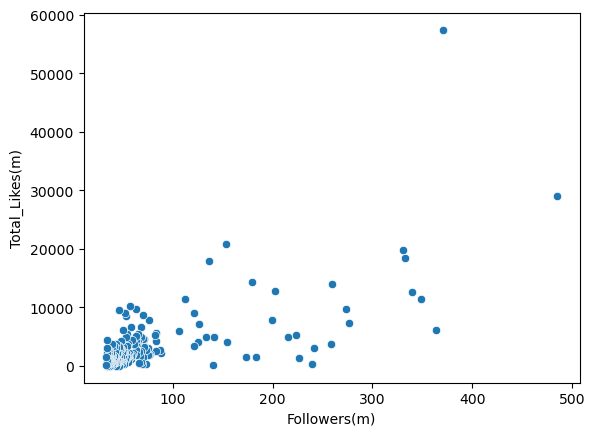

In [34]:
sns.scatterplot(data=df,x='Followers(m)',y='Total_Likes(m)')

<Axes: xlabel='Followers(m)', ylabel='Influence Score'>

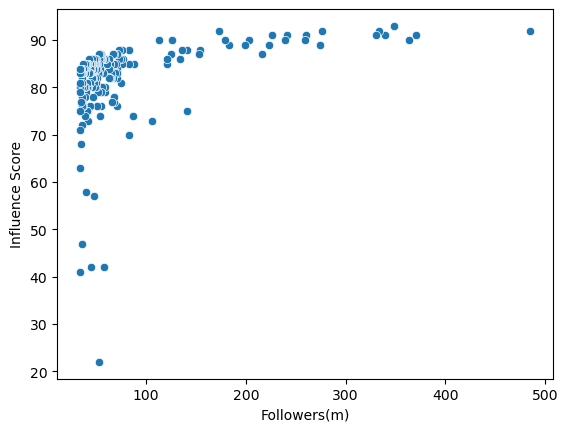

In [35]:
sns.scatterplot(data=df,x='Followers(m)',y='Influence Score')

<Axes: xlabel='Posts(k)', ylabel='Avg_Likes(m)'>

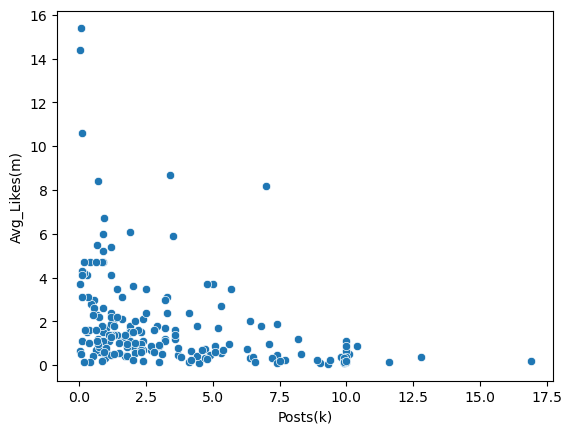

In [36]:
sns.scatterplot(data=df,x='Posts(k)',y='Avg_Likes(m)')

<Axes: xlabel='Posts(k)', ylabel='Influence Score'>

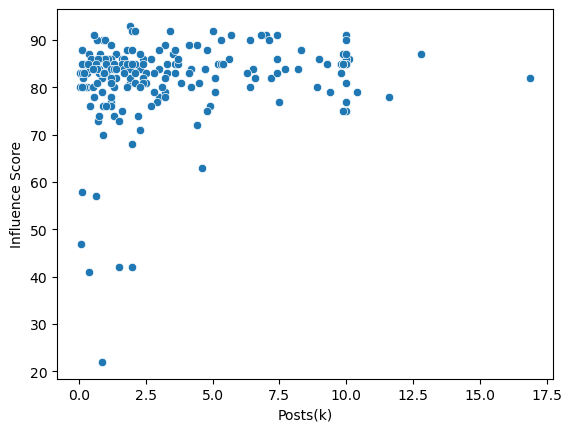

In [37]:
sns.scatterplot(data=df,x='Posts(k)',y='Influence Score')